In [8]:
from preprocess import preprocess
from LDA import LDA_model
import pandas as pd
import numpy as np
import os
import pyLDAvis
from pathlib import Path

In [ ]:
model_a = LDA_model('C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/','Papers',model_type='normal')
model_a.build_corpus()
model_a.df = pd.read_csv('C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/search_results_7_27B.csv')
model_a.make_pyvis('tst7_29_A_')
model_a.get_sum()
scores_a = model_a.score_totals

# Make weights testing

In [1]:
from make_weights import make_weights

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processi

In [40]:
industry_file = '3_29_industry'
academic_file = '3_29_academic'

In [3]:
BASE_PATH = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/'
DIRECTORY = 'Papers'
TARGET_PATH = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/Outputs'
ITERATIONS = 1

weight_maker = make_weights(base_path = BASE_PATH,
                        directory = DIRECTORY,
                        target_path = TARGET_PATH,
                        iterations = ITERATIONS,
                        name = academic_file,
                        save = False)

print('Base Path: {}\nDirectory: {}\nTarget Path: {}'.format(BASE_PATH,DIRECTORY,TARGET_PATH))


INDUSTRY_DIRECTORY = 'industry_articles'

industry_weight_maker = make_weights(base_path = BASE_PATH,
                        directory = INDUSTRY_DIRECTORY,
                        target_path = TARGET_PATH,
                        iterations = ITERATIONS,
                        name = industry_file,
                        save = False )

Base Path: C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/
Directory: Papers
Target Path: C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/Outputs


In [ ]:
weight_maker.create_weights()

industry_weight_maker.create_weights()

Model Guts

In [ ]:
# academic_df = weight_maker.saliency_df
# industry_df = industry_weight_maker.saliency_df

In [ ]:
# industry_df.to_csv('./Outputs/{}.csv'.format(industry_file))
# academic_df.to_csv('./Outputs/{}.csv'.format(academic_file))

# Make_Weights Verification

In [29]:
log_df = pd.DataFrame(columns=['Term','Normalized_Saliency','Corpus'])
TESTS = 100

key = ['long_term_cost','short_term_cost','policy_incentives',
        'suitability_compatibility','familiarity_knowledge','norms_attitudes',
        'brand_image','sustainability','reliability_uncertainty','driver_acceptance']

In [12]:
verifaction_path = Path(TARGET_PATH + '/3_28_verification.csv')

In [14]:
verification_df = pd.read_csv(verifaction_path)
verification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2000 non-null   int64  
 1   Term                 2000 non-null   object 
 2   Normalized_Saliency  2000 non-null   float64
 3   Corpus               2000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 62.6+ KB


<AxesSubplot:>

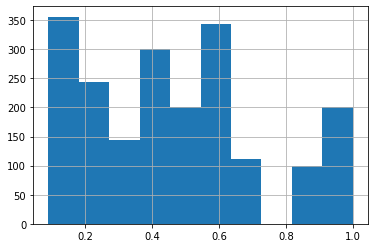

In [21]:
verification_df['Normalized_Saliency'].hist()

In [71]:
academic_df = verification_df.loc[verification_df["Corpus"] == 'academic']
academic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1989
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   Term                 1000 non-null   object 
 2   Normalized_Saliency  1000 non-null   float64
 3   Corpus               1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 39.1+ KB


In [69]:
industry_df = verification_df.loc[verification_df["Corpus"] == 'industry']
academic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10 non-null     int64  
 1   Term                         10 non-null     object 
 2   Average_Normalized_Saliency  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [17]:
tst_df = academic_df.loc[academic_df['Term'] == 'driver_acceptance']

In [67]:
tst_df['Normalized_Saliency'].min()

0.1771830494403382

In [77]:
def calculate_variance_pct(series):
    variance = series.var()
    variance_pct = (variance / series.min())*100
    return variance, variance_pct

In [78]:
def get_term_stats(df,term):
    tmp_df = df.loc[df['Term'] == term]
    mean = tmp_df['Normalized_Saliency'].mean()
    variance, pct = calculate_variance_pct(tmp_df['Normalized_Saliency'])
    return mean, variance, pct

In [79]:
industry_verification_dict = {'Term':[],'Normalized_Saliency':[],'Variance':[],'Percent_Variance':[]}
academic_verification_dict = {'Term':[],'Normalized_Saliency':[],'Variance':[],'Percent_Variance':[]}
for term in key:
    academic_mean, academic_variance, academic_variance_pct = get_term_stats(academic_df, term)
    industry_mean, industry_variance, industry_variance_pct = get_term_stats(industry_df, term)

    industry_verification_dict['Term'].append(term)
    industry_verification_dict['Normalized_Saliency'].append(industry_mean)
    industry_verification_dict['Variance'].append(industry_variance)
    industry_verification_dict['Percent_Variance'].append(industry_variance_pct)

    academic_verification_dict['Term'].append(term)
    academic_verification_dict['Normalized_Saliency'].append(academic_mean)
    academic_verification_dict['Variance'].append(academic_variance)
    academic_verification_dict['Percent_Variance'].append(academic_variance_pct)

academic_stats_df = pd.DataFrame(academic_verification_dict)
industry_stats_df = pd.DataFrame(industry_verification_dict)

academic_final_saliency_df = academic_stats_df[['Term','Normalized_Saliency']].copy()
industry_final_saliency_df = industry_stats_df[['Term','Normalized_Saliency']].copy()


In [84]:
academic_stats_df["Corpus"] = 'academic'
industry_stats_df["Corpus"] = 'industry'

set = [academic_stats_df,industry_stats_df]

stats_df = pd.concat(set)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Term                 20 non-null     object 
 1   Normalized_Saliency  20 non-null     float64
 2   Variance             20 non-null     float64
 3   Percent_Variance     20 non-null     float64
 4   Corpus               20 non-null     object 
dtypes: float64(3), object(2)
memory usage: 960.0+ bytes


In [85]:
stats_df.to_csv('./Outputs/3_30_all_verification_stats.csv')

# Weight Concatenation

In [ ]:
from pathlib import Path
import pandas as pd

In [41]:
weight_path = Path('C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/Outputs')
industry_weight_path = weight_path / '{}_weights.csv'.format(industry_file)
academic_weights_path = weight_path / '{}_weights.csv'.format(academic_file)

In [42]:
industry_df = pd.read_csv(industry_weight_path)
academic_df = pd.read_csv(academic_weights_path)

Check for same length

In [43]:
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10 non-null     int64  
 1   Term                         10 non-null     object 
 2   Average_Normalized_Saliency  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [44]:
academic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10 non-null     int64  
 1   Term                         10 non-null     object 
 2   Average_Normalized_Saliency  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


## Make Data Frame with scores from both corpora for each word

In [28]:
key = ['long_term_cost','short_term_cost','policy_incentives',
        'suitability_compatibility','familiarity_knowledge','norms_attitudes',
        'brand_image','sustainability','reliability_uncertainty','driver_acceptance']

In [50]:
def get_term_saliency(term,df):
    tmp_df = df.loc[df['Term'] == term]
    return tmp_df['Average_Normalized_Saliency'].item() 

In [51]:
# Final saliency scores are the average of 100 ensembles of 8 models (N = 800) normalized 0-1
compare = {'Term':[],'Academic_Normalized_Saliency':[],'Industry_Normalized_Saliency':[]}
for term in key:
    academic_saliency = get_term_saliency(term,academic_df)
    industry_saliency = get_term_saliency(term,industry_df)
    compare['Term'].append(term)
    compare['Academic_Normalized_Saliency'].append(academic_saliency)
    compare['Industry_Normalized_Saliency'].append(industry_saliency)
saliency_comparison_df = pd.DataFrame(compare)


In [102]:
output_file = '3_29_verification'

In [53]:
saliency_comparison_df.to_csv('./Outputs/{}_saliency_comparison.csv'.format(output_file))

# Visualize

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px

In [55]:
weight_path = Path('C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/Outputs')
saliency_comparison_path = weight_path / '{}_saliency_comparison.csv'.format(output_file)

In [56]:
saliency_comparison_df = pd.read_csv(saliency_comparison_path)

In [57]:
key = ['long_term_cost','short_term_cost','policy_incentives',
        'suitability_compatibility','familiarity_knowledge','norms_attitudes',
        'brand_image','sustainability','reliability_uncertainty','driver_acceptance']

display_key = ['Long-term Cost','Short-term Cost','Policy/Incentives',
        'Suitability/Compatibility','Familiarity/Knowledge','Norms/Attitudes',
        'Brand image','Sustainability','Reliability/Uncertainty','Driver Acceptance']

## Plotly Radar

In [58]:
categories = display_key
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = saliency_comparison_df['Academic_Normalized_Saliency'],
    theta = categories,
    fill = 'toself',
    name = 'Academic Normalized Saliency',
    line_color = '#5ebfbc',
))

fig.add_trace(go.Scatterpolar(
    r= saliency_comparison_df['Industry_Normalized_Saliency'],
    theta = categories,
    fill = 'toself',
    #fillcolor = '#88d184',
    line_color = '#88d184',
    name = 'Industry Normalized Saliency'
))

fig.update_layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [0,1]
        )
    )
)

In [59]:
fig.write_image("outputs/{}_radar.png".format(output_file))

## Plotly Bar Chart

In [64]:
stats_df = pd.read_csv('./Outputs/3_29_industry_verification.csv')

In [104]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = academic_stats_df["Term"],
    y = academic_stats_df['Normalized_Saliency'],
    name = 'Average Academic Normalized Saliency',
    marker_color = '#5ebfbc',
    error_y = dict(type = 'data', array = academic_stats_df['Variance'])
))


fig.add_trace(go.Bar(
    x = industry_stats_df['Term'],
    y = industry_stats_df['Normalized_Saliency'],
    name = 'Average Indsutry Normalized Saliency',
    marker_color = '#88d184',
    error_y = dict(type = 'data', array = industry_stats_df['Variance'])
))
fig.update_layout(barmode='group',
                  xaxis = {'categoryorder':'total descending'})

In [105]:
fig.write_image("outputs/{}_bar_chart_with_error.png".format(output_file))

## Matplot Lib

In [ ]:
dft = saliency_comparison_df.loc[:,['Term','Academic_Normalized_Saliency','Industry_Normalized_Saliency']]

dft.rename(columns={
    'Academic_Normalized_Saliency' : 'Academic Normalized Saliency',
    'Industry_Normalized_Saliency' : 'Industry Normalized Saliency',
},inplace=True)

dft.set_index('Term',inplace=True)

In [ ]:
dft.head()

In [ ]:
# Reshape so each term is a column and each row is a corpus
dft = dft.transpose()

In [ ]:
# Each attribute we'll plot in the radar chart.
labels = key

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(corpus, color):
  values = dft.loc[corpus].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=corpus)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Academic Normalized Saliency', '#1aaf6c')
add_to_radar('Industry Normalized Saliency', '#429bf4')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing Saliency Across Corpora', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))